# Examine Keywords in Summaries

Hypothesis: More highly rated summaries will contain more keywords.

In [1]:
import pandas as pd

In [2]:
summaries = pd.read_csv('../../2022_09_21_textbook/results/qualtrics_survey.csv', index_col=0)
summaries

,index,id,content,wording,containment,similarity,PROLIFIC_PID,question,summary,section,word_count
0,37,55895b93fdf99b6bd06017c42,0.778389,-0.054625,0.0496,0.786655,55895b93fdf99b6bd06017c4,Summary 1.2,"upon completion of this section, you will have...",2,165
1,57,55895b93fdf99b6bd06017c43,1.025576,0.569411,0.1977,0.866808,55895b93fdf99b6bd06017c4,Summary 1.3,"in this section, students will acquire the abi...",3,146
2,8,589fc07f1521230001ebf4941,0.020496,0.410959,0.0000,0.558993,589fc07f1521230001ebf494,Summary 1.1,economics is the study of how people make choi...,1,60
3,78,589fc07f1521230001ebf4944,0.222764,0.799655,0.1395,0.602298,589fc07f1521230001ebf494,Summary 1.4,the heritage foundation categorizes types of e...,4,61
4,24,5ae21dfffef71c0001be9caf2,0.853287,1.181120,0.0377,0.666113,5ae21dfffef71c0001be9caf,Summary 1.2,economics can be divided into two categories: ...,2,86
...,...,...,...,...,...,...,...,...,...,...,...
85,82,63c3343c5a670ddd37e82f2b4,NaN,NaN,0.7222,0.675081,63c3343c5a670ddd37e82f2b,Summary 1.4,the economic life of every individual is inter...,4,138
86,46,63cbfaf6ab54f6b8d8a054d73,0.203609,0.488507,0.0476,0.583612,63cbfaf6ab54f6b8d8a054d7,Summary 1.3,this explains the difference between economics...,3,34
87,69,63cbfaf6ab54f6b8d8a054d74,0.866121,0.928553,0.0333,0.511567,63cbfaf6ab54f6b8d8a054d7,Summary 1.4,this introduction describes the different type...,4,57
88,6,63cc61c7c2ae0809f0c71cb51,NaN,NaN,0.7302,0.550148,63cc61c7c2ae0809f0c71cb5,Summary 1.1,"every society, at every level, must make choic...",1,102


In [3]:
from ast import literal_eval

keyterms = pd.read_csv('../results/macroeconomics-2e-results.csv')[:4]

keyterms['Gold'] = keyterms['Gold'].apply(literal_eval)
keyterms['Pred'] = keyterms['Pred'].apply(literal_eval)

keyterms['section'] = [1, 2, 3, 4]
keyterms

,Section,Gold,Pred,section
0,1-1-what-is-economics-and-why-is-it-important,"[Economics, Scarcity, division of labor, speci...","[Economics, Scarcity, division of labor, speci...",1
1,1-2-microeconomics-and-macroeconomics,"[Microeconomics, Macroeconomics, monetary poli...","[Microeconomics, Macroeconomics, monetary poli...",2
2,1-3-how-economists-use-theories-and-models-to-...,"[theory, model, circular flow diagram, goods a...","[theory, circular flow diagram]",3
3,1-4-how-to-organize-economies-an-overview-of-e...,"[traditional economy, command economy, market,...","[traditional economy, command economy, market,...",4


In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

def term_extract(summ, terms):
    doc = t.lemma_ for t in nlp(summ)
    terms = [nlp(term) for term in terms]
    return sum([1 for t in terms if t in doc])

# keyterms.iloc[0].Pred
# summaries.iloc[0].summary

In [35]:
df = (
    summaries
    .merge(keyterms, on='section')
    .assign(
        predicted_terms_included = lambda x: x.apply(lambda x: term_extract(x.summary, x.Pred), axis=1),
        gold_terms_included = lambda x: x.apply(lambda x: term_extract(x.summary, x.Gold), axis=1)
    )
)

df

,index,id,content,wording,containment,similarity,PROLIFIC_PID,question,summary,section,word_count,Section,Gold,Pred,predicted_terms_included,gold_terms_included
0,37,55895b93fdf99b6bd06017c42,0.778389,-0.054625,0.0496,0.786655,55895b93fdf99b6bd06017c4,Summary 1.2,"upon completion of this section, you will have...",2,165,1-2-microeconomics-and-macroeconomics,"[Microeconomics, Macroeconomics, monetary poli...","[Microeconomics, Macroeconomics, monetary poli...",1,1
1,24,5ae21dfffef71c0001be9caf2,0.853287,1.181120,0.0377,0.666113,5ae21dfffef71c0001be9caf,Summary 1.2,economics can be divided into two categories: ...,2,86,1-2-microeconomics-and-macroeconomics,"[Microeconomics, Macroeconomics, monetary poli...","[Microeconomics, Macroeconomics, monetary poli...",0,0
2,32,5ae59f8cc3c3ab00018f71852,0.857791,0.468952,0.0357,0.662069,5ae59f8cc3c3ab00018f7185,Summary 1.2,economics covers many different things and can...,2,46,1-2-microeconomics-and-macroeconomics,"[Microeconomics, Macroeconomics, monetary poli...","[Microeconomics, Macroeconomics, monetary poli...",0,0
3,36,5b3e3a299a6a140001222ea12,0.953033,1.149842,0.1512,0.628078,5b3e3a299a6a140001222ea1,Summary 1.2,economics covers almost everything from the we...,2,133,1-2-microeconomics-and-macroeconomics,"[Microeconomics, Macroeconomics, monetary poli...","[Microeconomics, Macroeconomics, monetary poli...",0,0
4,22,5d9d5e2e43c6e300159417ae2,0.989698,0.321217,0.0315,0.781912,5d9d5e2e43c6e300159417ae,Summary 1.2,"in short, this section is a broad description...",2,215,1-2-microeconomics-and-macroeconomics,"[Microeconomics, Macroeconomics, monetary poli...","[Microeconomics, Macroeconomics, monetary poli...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,77,63b5681c49af1cbe651420bc4,0.392519,0.007284,0.0000,0.710177,63b5681c49af1cbe651420bc,Summary 1.4,"economies are complex systems, but we can use ...",4,223,1-4-how-to-organize-economies-an-overview-of-e...,"[traditional economy, command economy, market,...","[traditional economy, command economy, market,...",2,3
86,79,63b63938dbf229f3eb46d4a44,0.502883,0.810104,0.0194,0.660141,63b63938dbf229f3eb46d4a4,Summary 1.4,there are three common ways in which an econom...,4,225,1-4-how-to-organize-economies-an-overview-of-e...,"[traditional economy, command economy, market,...","[traditional economy, command economy, market,...",3,4
87,84,63be7173226d9b8c566ddd444,0.365063,0.021094,0.5270,0.704749,63be7173226d9b8c566ddd44,Summary 1.4,there are at least three ways that societies o...,4,112,1-4-how-to-organize-economies-an-overview-of-e...,"[traditional economy, command economy, market,...","[traditional economy, command economy, market,...",2,2
88,82,63c3343c5a670ddd37e82f2b4,NaN,NaN,0.7222,0.675081,63c3343c5a670ddd37e82f2b,Summary 1.4,the economic life of every individual is inter...,4,138,1-4-how-to-organize-economies-an-overview-of-e...,"[traditional economy, command economy, market,...","[traditional economy, command economy, market,...",2,2


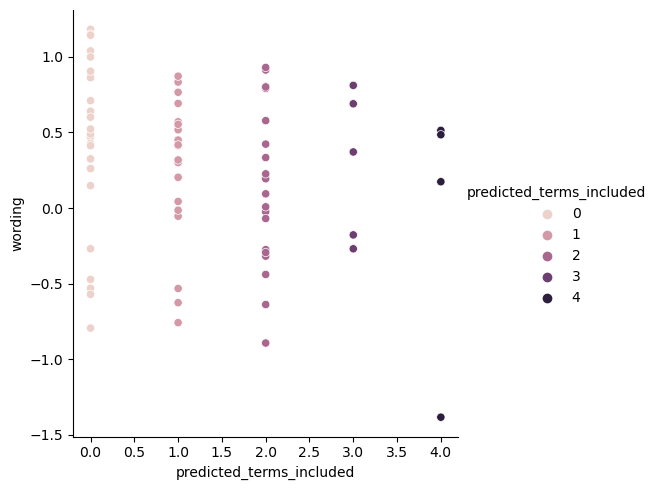

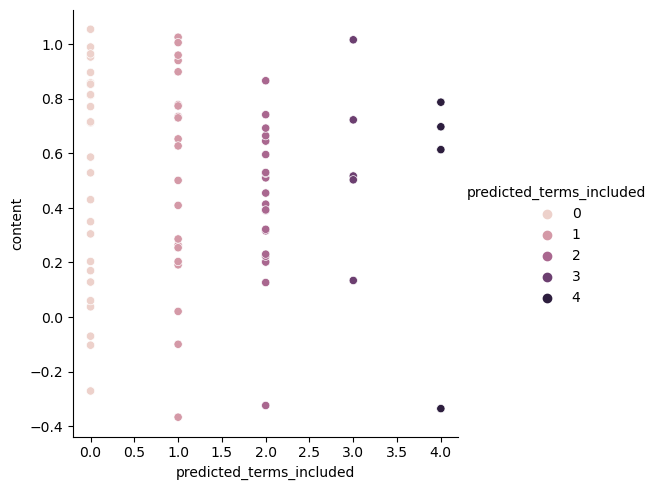

In [71]:
import seaborn as sns

test_df = df[df.wording.notna() & (df.containment < .5)]


sns.relplot(data=test_df, x='predicted_terms_included', y='wording', hue='predicted_terms_included')
sns.relplot(data=test_df, x='predicted_terms_included', y='content', hue='predicted_terms_included')

In [59]:
df.groupby('predicted_terms_included').containment.describe()

,count,mean,std,min,25%,50%,75%,max
predicted_terms_included,,,,,,,,
0,33.0,0.169958,0.286167,0.0000,0.009500,0.0357,0.108100,0.8795
1,24.0,0.164000,0.253019,0.0000,0.016925,0.0502,0.171075,0.8197
2,23.0,0.130822,0.187316,0.0000,0.012300,0.0333,0.147050,0.7222
3,6.0,0.213450,0.255067,0.0194,0.036575,0.0877,0.347325,0.6325
4,4.0,0.151725,0.220838,0.0286,0.031075,0.0481,0.168750,0.4821


In [72]:
import statsmodels.api as sm

mod = sm.OLS(test_df.wording, test_df.predicted_terms_included)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                wording   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              3.215
Date:                Tue, 07 Feb 2023   Prob (F-statistic):                      0.0769
Time:                        16:29:40   Log-Likelihood:                         -69.928
No. Observations:                  78   AIC:                                      141.9
Df Residuals:                      77   BIC:                                      144.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

# Insufficient Evidence to Reject Null!

Most summaries do not include any keyterms. Looks like there is an effect, but it is likely not very strong.

Should repeat analysis with bigger dataset.

This does not necessarily mean that the keyterms would make for bad student feedback, but my sense is that it is a clunky metric. Should also try per-section semantic overlap.